In [28]:
from numpy import *
def heunn(x0, f, t0, tf, n):
    """ Calcula la evolución del sistema o ecuación diferencial empleando como método de aproximación
        el método de Heunn, un método Runge Kutta de segundo orden que emplea aproximación por el área del trapecio.
        :parametro x0: Estado inicial, condiciones iniciales
        :parametro f: Función de carga f(t,x)
        :parametro t0: Tiempo inicial
        :parametro tf: Tiempo final
        :parametro n: Cantidad de puntos
    """
    h = (tf - t0) / n
    t = [t0]
    x = [x0]
    for i in range(1, n+1):
        t.append(t[i - 1] + h)
        k1 = f(t[i-1], x[i-1])
        k2 = f(t[i-1] + h, x[i - 1] + h * k1)
        x.append(x[i - 1] + 0.5 * h * (k1 + k2))
    return array(t), array(x)

In [29]:
# Computando el problema usando heunn
t0 = 0
tf = 1
n = 10
f = lambda t, x: array([x[1], 2.5 * x[1] + 1.5 * x[0] + 22.5 * exp(2 * t)])
x0 = array([2, 1])
t, x = heunn(x0, f, t0, tf, n)

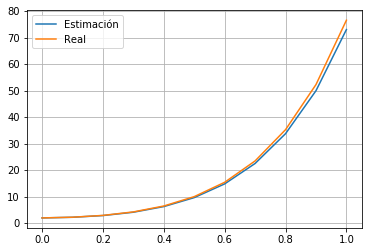

In [30]:
# Graficamos los resultados y los comparamos con los reales
xreal = 4 * exp(-0.5 * t) + 7 * exp(3 * t) - 9 * exp(2 * t)
xestimated = [pair[0] for pair in x]

# Ploteando
from matplotlib import pyplot

pyplot.plot(t, xestimated, label="Estimación")
pyplot.plot(t, xreal, label="Real")
pyplot.grid()
pyplot.legend()
pyplot.show()